<a href="https://colab.research.google.com/github/jaibairagi01/Machine-Learning-and-Implementation/blob/main/Implementing_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression:**

Y = wX + b

Y --> Dependent Variable

X --> Independent Variable

w --> weight

b --> bias

**Gradient Descent:**

Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.

w = w - α*dw

b = b - α*db

**Learning Rate:**

Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.

In [ ]:
#Importing the Library
import numpy as np

**Linear Regression Model**

In [18]:
class Linear_Regression:

#Initiating the parameters
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

# X = yoe and Y = salary
  def fit(self,X, Y):

    #no. of trainings m examples & no. of features n
    self.m, self.n = X.shape  #nuber of rows & columns

    #initiate the weight/slope and bias/intercept

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing the gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    Y_prediction = self.predict(self.X)

    #calculate gradient

    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m

    db = - 2 * np.sum(self.Y - Y_prediction) / self.m

    #updating the weights

    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db



  def predict(self,X):

    return X.dot(self.w) + self.b  #Y = wx + b




Work flow of the Linear Regression model

Step 1: Set Learning Rate & Number of Iterations; Initate Random weight and bias value

Step 2: Build Linear Regression Equation. (y = wx + b) or (y = mx + c)

Step 3: Find the "y pred" value for given x value for the corresponding weight & bias.

Step 4: Check the loss function for these parameter values. (difference between "y pred" & "true y")

Step 5: Update the parameter values using Gradient Descent. (new weight & bias value)

Step 6: Step 3, 4, 5 are repeated till we get minimum loss function

Finally we will get the best model (best weight and bias value) as it has minimum loss function

Using Linear Regression Model for Prediction

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data Pre-Processing

In [4]:
salary_data = pd.read_csv("/content/salary_data.csv")

In [6]:
#printing the 5 rows
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [7]:
#printg the last 5 rows
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [8]:
#print the number of rows and columns is the dataframe
salary_data.shape

(30, 2)

In [10]:
#missing values found and remove it
#imputation
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the features & target

In [14]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [12]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [15]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Splitting the dataset into training & test data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 2)

Training the Linear Regression model

In [19]:
model = Linear_Regression(learning_rate = 0.02, no_of_iterations = 100)

In [21]:
model.fit(X_train, Y_train)

In [22]:
#printing the parameter values(weights & Bias)

print("weight = ", model.w[0])
print("bias = ", model.b)

weight =  10941.258155090314
bias =  13499.045037502532


Y = 10941(x) + 13499

salary = 10941(experience) + 13499

Predict the salary value for test data

In [23]:
test_data_prediction = model.predict(X_test)

In [24]:
print(test_data_prediction)

[ 27722.68063912  25534.4290081   62734.70673541  53981.70021134
  91181.97793864  79146.59396804 103217.36190924  46322.81950277
  35381.56134768  87899.60049212]


Visulizing the predicted values & actual values

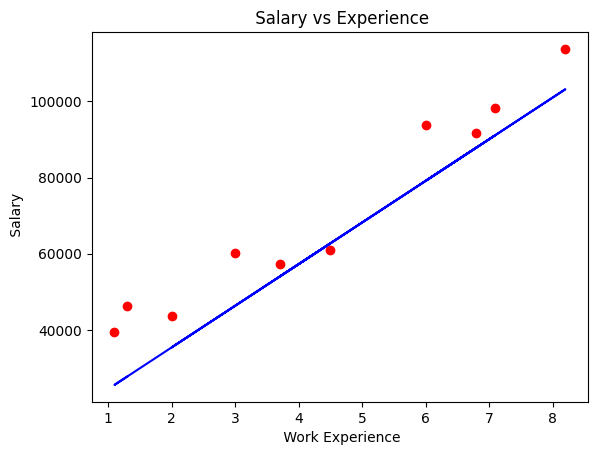

In [27]:
plt.scatter(X_test, Y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel(' Work Experience')
plt.ylabel(' Salary')
plt.title(' Salary vs Experience')
plt.show()